In [1]:
import MySQLdb as mdb 
import sys

In [2]:
# From Panos Ipeirotis Github Copy Pasta
host = '173.194.242.182'
username = 'heesung1' #user's own input
password = 'huesungpls123'
database = 'citation_analysis_db'

con = mdb.connect(host, username, password, database,
                 charset = 'utf8', use_unicode = True)

cur = con.cursor()

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns #Visualization feature. Pretty neat
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('whitegrid')

In [4]:
publications = pd.read_sql(sql = 'SELECT * FROM publication_citations_per_year LIMIT 100000', con=con) #Set connection

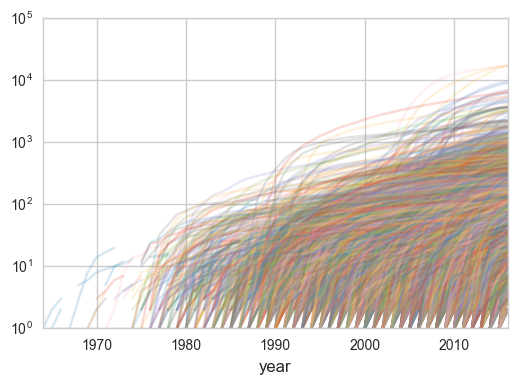

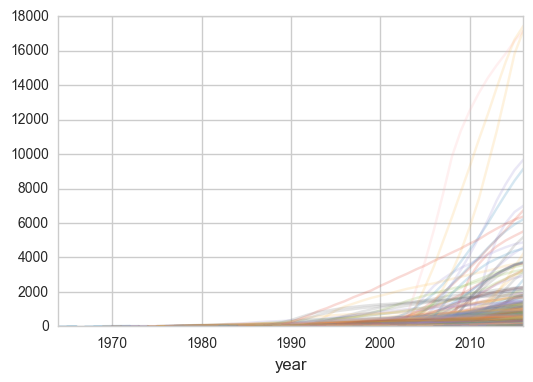

In [5]:
pub = publications.pivot(index = 'year', columns = 'publication_id', values = 'citations').cumsum() #Get a pivot table of pub
pub.plot(legend=False, logy = True, alpha=0.2) #Create logarthmic plot
pub.plot(legend=False, logy = False, alpha=0.2) #Create non-log plot

From here we can see that there aer irregularities within the time series for some publications. Primarily in the 1950's and 1960's. This may be due to poor records of the publications being kept. 

Additionally, if we were to take a look at the secodn graph we can see clear outliers in the publication data. There are couple which exhibit a more exponential growth rather than linear or polynomial. In this case it would be better to remove the outliers for further examination later. 

In [92]:
publication_0 = [] #Initialize empty list to create non-jagged time series array

ids = range(3,12533) #Hard coded number 
for id in ids:
    a = pd.DataFrame(publications.ix[publications.publication_id == id])
    a = pd.DataFrame(a.ix[:,2]).reset_index(drop = True)
    publication_0.append(a)

publication_0 = pd.concat(publication_0, axis = 1) #concatenate the appended list
ids = map(str,ids) #map the id's to column names
publication_0.columns = ids

In [93]:
publication_0 = publication_0.dropna(axis = 1, how= "all") #We drop the publications which have 0 citations in general

len(publication_0.columns) #Check the length of new publication dataframe

8777

We can see that we went from 100,000 documents to appx 8777 publicaitons. Although not preferable to be dropping data like this, it's inevitable since there are many publications that have 0 citations.

We have 8.7% retention so far

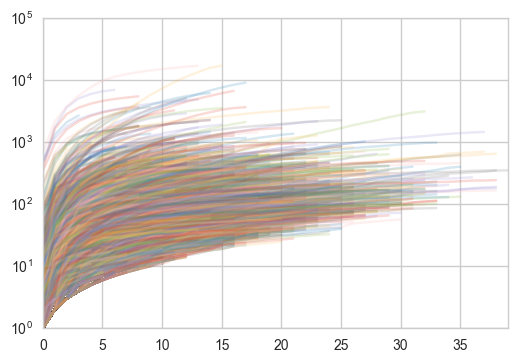

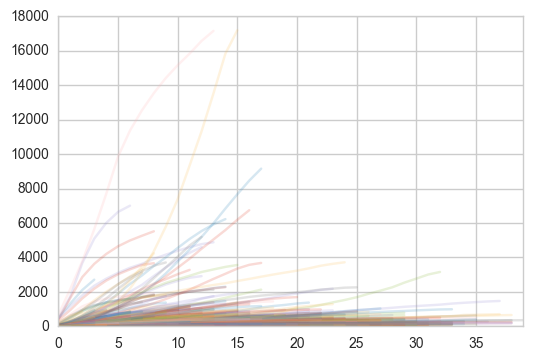

In [8]:
df = publication_0.cumsum() #Create new dataframe for cumulative analysis
df.plot(legend = False, logy = True, alpha = 0.2); #";" is primarily to get rid of that pesky matplotlib.ax notification
df.plot(legend = False, logy = False, alpha = 0.2);

Nothing much has drastically changed from the prior graphs illustrated. It's simply the origin time has been shifted to 0 for all publications and now we can see which publications have tremendous outlier tendencies. We can see that there are some that has acheived 2000+ within first 3 years. 

Another has exploded in growth after year 5 etc. Majority can be said to stay within < 2000 after year 5

In [94]:
publication = publication_0.dropna(axis = 1 ,thresh = 3) #We are now dropping the publications that have less than 3 consecutvie citations
publication

,4,5,6,9,10,12,13,14,16,19,...,12504,12505,12506,12507,12516,12524,12525,12527,12528,12532
0,2.0,7.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,3.0,...,3.0,3.0,2.0,6.0,2.0,2.0,3.0,1.0,13.0,1.0
1,2.0,16.0,3.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,...,10.0,1.0,9.0,23.0,4.0,2.0,5.0,11.0,21.0,1.0
2,2.0,19.0,4.0,2.0,3.0,2.0,1.0,9.0,1.0,4.0,...,13.0,1.0,3.0,18.0,2.0,15.0,7.0,3.0,13.0,1.0
3,3.0,16.0,5.0,1.0,1.0,3.0,1.0,13.0,3.0,5.0,...,10.0,1.0,2.0,13.0,1.0,10.0,3.0,5.0,13.0,NaN
4,2.0,14.0,NaN,1.0,2.0,1.0,1.0,7.0,5.0,7.0,...,15.0,NaN,2.0,12.0,NaN,15.0,1.0,2.0,15.0,NaN
5,NaN,NaN,NaN,1.0,2.0,2.0,2.0,7.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,8.0,1.0,3.0,NaN,NaN
6,NaN,NaN,NaN,1.0,1.0,1.0,NaN,4.0,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now went from 8777 to 6765 publications. Not much information loss here.

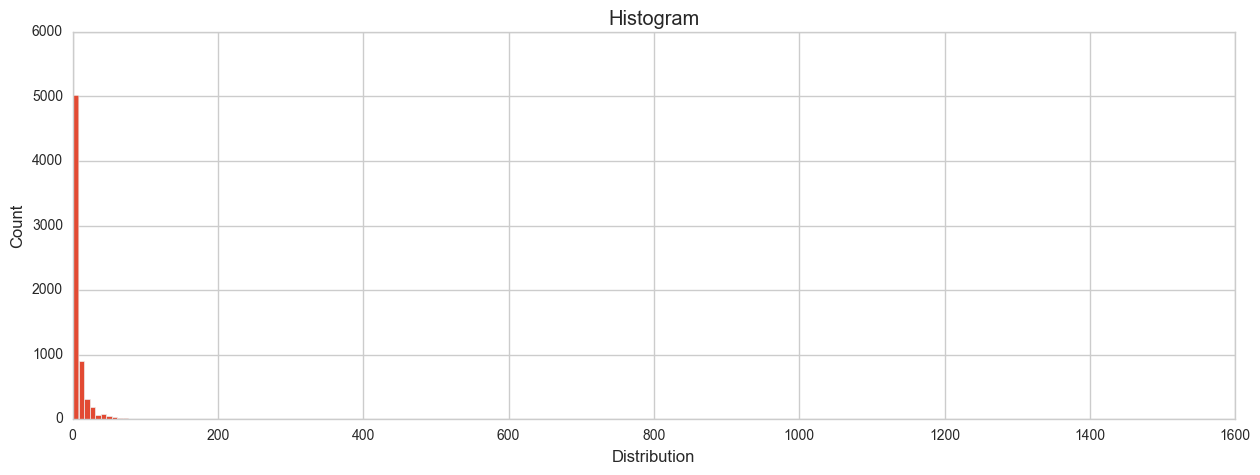

In [103]:
plt.figure(figsize=(15,5))
plt.hist(publication.ix[1,:], bins=200)
plt.xlabel("Distribution")
plt.ylabel("Count")
plt.title("Histogram")
plt.show() #Highly Right skewed. What else to expect

In [10]:
import statsmodels.api as sm #import statistics package for analysis

In [11]:
def drop(x): #This function is to drop the NaN values inside the arrays to perform a primitive TSA 
    x = x[~np.isnan(x)]
    return x

In [95]:
pub_acf = [] #Initiazlie an empty array
for i in range(0,len(publication.columns)):
    a = sm.stats.diagnostic.acorr_ljungbox(drop(publication.ix[:,i]), lags = 1) #We implement a lag 1 to have a sense of autocorrelation
    pub_acf.append(a)
pub_acf = np.concatenate(pub_acf, axis = 1)
pub_acf = pd.DataFrame(pub_acf, columns=publication.columns.values) #Convert array to dataframe retaining column names
pub_acf

,4,5,6,9,10,12,13,14,16,19,...,12504,12505,12506,12507,12516,12524,12525,12527,12528,12532
0,0.787500,0.006659,0.5000,0.106061,1.045015,0.285292,0.066667,0.315582,0.228008,0.201917,...,0.000523,0.055556,0.441911,0.591720,0.112188,0.072496,1.431687,2.036510,1.519097,NaN
1,0.374857,0.934964,0.4795,0.744674,0.306658,0.593254,0.796253,0.574275,0.633005,0.653178,...,0.981759,0.813664,0.506202,0.441755,0.737666,0.787737,0.231489,0.153562,0.217756,NaN


There are 2 rows that are returned as results. We shall focus on the second row. Those contains the p-values that indicates whether we can reject the null-hypothesis that it's stationary process that does not exhibit non-level volatility 

In [13]:
pub_pval = pub_acf.ix[:,(pub_acf.loc[1] > 0.05)]
print len(pub_pval.columns)
print pub_pval

5639
          4         5       6         9        10        12        13  \
0  0.787500  0.006659  0.5000  0.106061  1.045015  0.285292  0.066667   
1  0.374857  0.934964  0.4795  0.744674  0.306658  0.593254  0.796253   

         14        16        19    ...        12503     12504     12505  \
0  0.315582  0.228008  0.201917    ...     0.027006  0.000523  0.055556   
1  0.574275  0.633005  0.653178    ...     0.869467  0.981759  0.813664   

      12506     12507     12516     12524     12525     12527     12528  
0  0.441911  0.591720  0.112188  0.072496  1.431687  2.036510  1.519097  
1  0.506202  0.441755  0.737666  0.787737  0.231489  0.153562  0.217756  

[2 rows x 5639 columns]


Out of 100,000 examples, we now have reached only 5639 that are considered to have "independently-distrubted data. Although this is not much of an indicator but it works since we have significant amount of data to work with. 

Next will implement some ideas regarding time series anaylsis using regression techniques

In [106]:
#Create a percentiels function that ignores the Nans
#The quantiles function of Pandas does not operate when NaNs are present forcing of to use fillna which biases results
percentiles = [25, 50, 75, 90 , 95]
percentiles_function = lambda x: pd.Series(np.nanpercentile(x, q=percentiles).flatten(), index = percentiles)

In [48]:
for i in range(0,len(foo)):
    a = percentiles_function(x=publication.ix[i,:])
    print(np.array(a))

[  1.   2.   4.   8.  12.]
[  2.   4.   9.  20.  32.]
[  2.   4.  11.  25.  41.]
[  2.   4.  11.  26.  44.]
[  2.   5.  11.  25.  42.]
[  2.   4.  11.  25.  42.]
[  2.    4.   10.   23.   40.4]
[  2.   4.  10.  23.  39.]
[  2.   4.  10.  22.  37.]
[  2.   4.   9.  21.  36.]
[  2.    4.    9.   20.6  33.8]
[  2.   4.   9.  20.  34.]
[  2.    4.    9.   19.5  33. ]
[  2.   4.   8.  18.  30.]
[  2.   3.   8.  18.  28.]
[  2.    3.    8.   17.3  33. ]
[  2.   3.   8.  17.  29.]
[  2.     3.     8.    16.    27.15]
[  2.    3.    8.   15.5  26. ]
[  2.   3.   8.  17.  32.]
[  2.    3.    8.   15.2  28. ]
[  2.    4.    8.   17.   30.7]
[  2.    4.    8.   15.7  25. ]
[  2.    3.    8.   16.9  28. ]
[  2.     4.     8.    14.    26.55]
[  2.    4.    8.   18.   24.6]
[  2.   4.   8.  16.  25.]
[  2.    4.    8.   15.   26.5]
[  2.    3.    7.   19.4  27.7]
[  2.     4.     7.25  18.    25.45]
[  1.    3.    7.   15.8  25.6]
[  3.    4.   10.   21.8  34. ]
[  3.   5.  14.  22.  27.]
[  2.    

In [96]:
benchmark_cumulative = [] #initiazlie empty array for percentile
for i in range(0,len(df)):
    a = np.array(percentiles_function(x=df.ix[i,:]))
    benchmark_cumulative.append(a)

#benchmark_cumulative = np.concatenate(benchmark_cumulative, axis = 0)
benchmark_cumulative = np.array(benchmark_cumulative)
benchmark_cumulative = pd.DataFrame(benchmark_cumulative)
benchmark_cumulative

,0,1,2,3,4
0,1.00,2.0,3.00,7.0,11.00
1,3.00,6.0,12.00,25.0,41.00
2,6.00,11.0,24.00,51.0,84.00
3,8.00,16.0,35.00,79.0,131.85
4,11.00,21.0,48.00,106.0,177.00
5,14.00,26.0,58.00,131.0,214.00
6,17.00,32.0,70.00,158.0,253.20
7,20.00,37.0,77.00,166.5,277.00
8,23.00,43.0,88.00,193.0,310.75
9,26.00,48.0,99.25,212.0,346.00


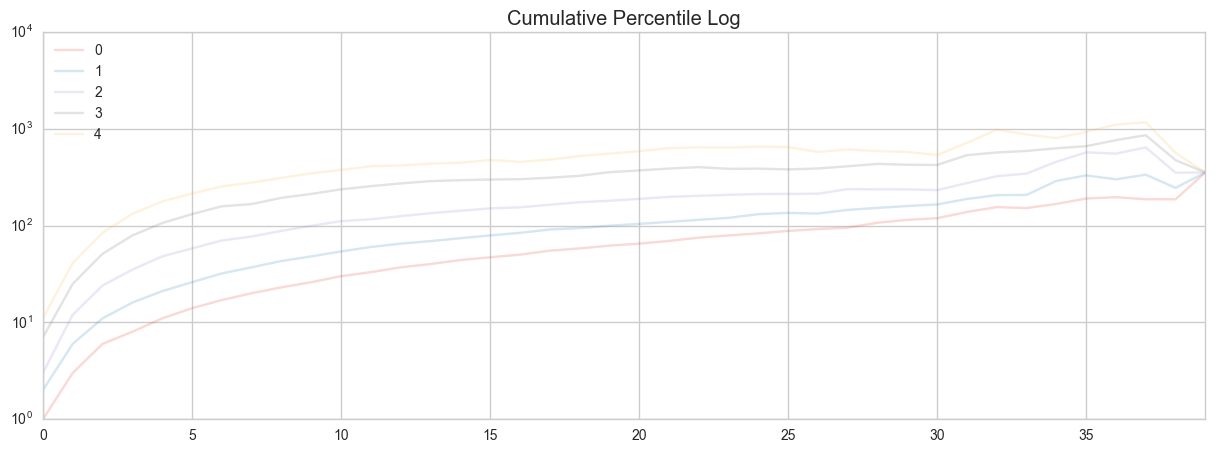

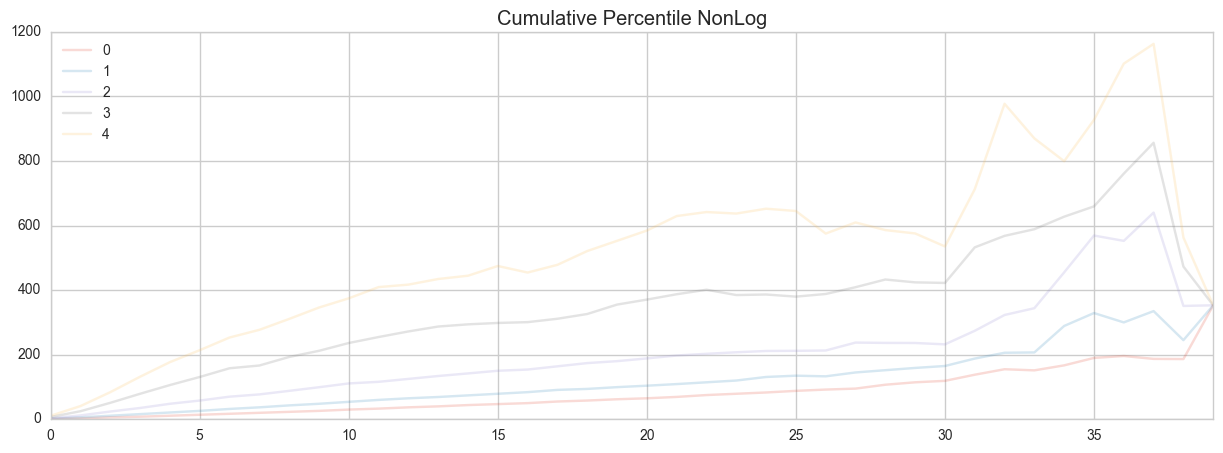

In [97]:
benchmark_cumulative.plot(legend = True, alpha = 0.2, logy = True, figsize=(15,5), title="Cumulative Percentile Log")
benchmark_cumulative.plot(legend = True, alpha = 0.2, logy = False, figsize=(15,5), title="Cumulative Percentile NonLog")

We can see that There are clear distinctions in terms of where each publication needs to be at in terms of Age and citations. The 95th percentile seems to have as much deviation from 90th percentile as it does from 75. This may primarily due to outliers that are affecting the analysis. 

Nonetheless, it is clear to see that they converge towards the "end" of the Age due to not enough data and there's a singualrity around age 42. 

C:\Users\heesu\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  app.launch_new_instance()


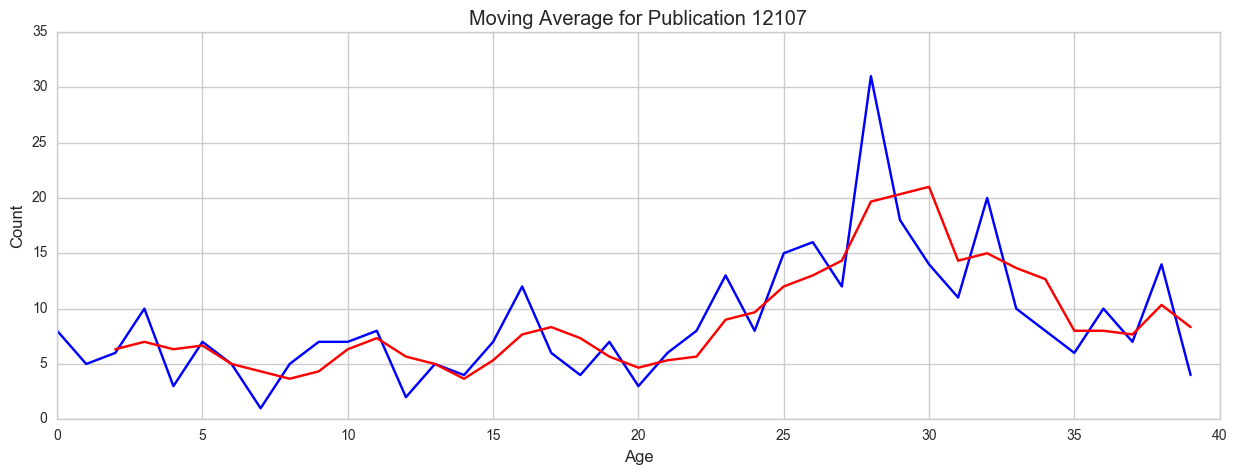

In [100]:
#Let's take a look at a stationary process. For instance 12107 a non-stationary example
#Also 2710 for another example
moving_avg = pd.rolling_mean(publication['12107'],3)
plt.figure(figsize=(15,5))
plt.plot(publication['12107'], color = "blue")
plt.plot(moving_avg, color = "red")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Moving Average for Publication 12107")
plt.show()

C:\Users\heesu\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app


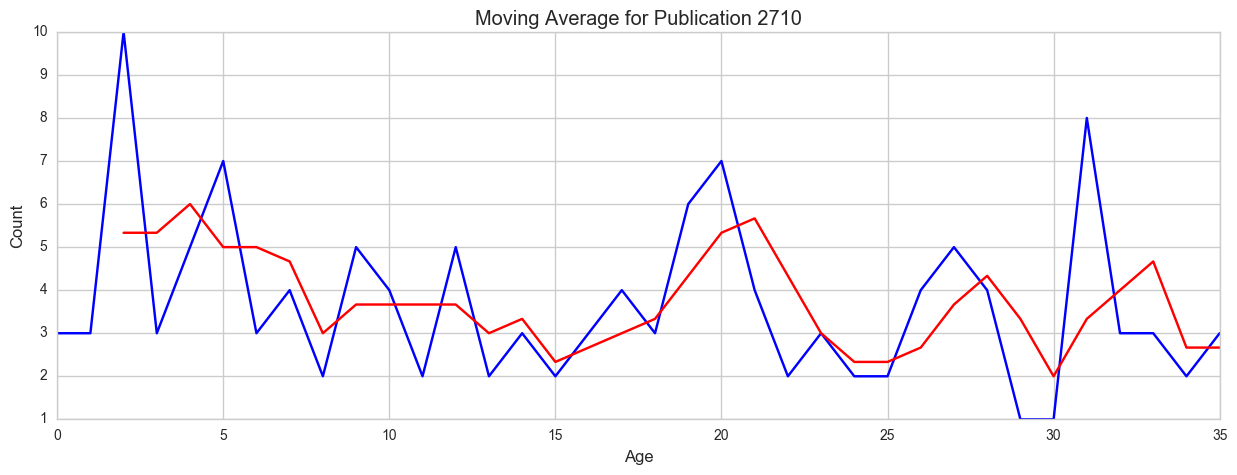

In [101]:
#This is "
moving_avg = pd.rolling_mean(publication['2710'], 3)
plt.figure(figsize=(15,5))
plt.plot(publication['2710'], color = "blue")
plt.plot(moving_avg, color = "red")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Moving Average for Publication 2710")
plt.show()

Analyzing the cumulative sum moving average is quite interesting. Due to the "liner" nature of the cumulative sum in the publications the moving average seems to track the citations quite relatively well. This is only true for the publications that have passed the Ljung-Box test

In [105]:
X = np.array(drop(publication['2710']))
bias = sm.add_constant(X, prepend=False)

#fit and summarise
mod = sm.OLS(X,bias)
mod1 = sm.GLSAR(X,bias)
res = mod.fit()
res1 = mod1.fit()
print res1.summary2()

           Results: Generalized least squares with AR(p)
Model:              GLSAR            Adj. R-squared:     1.000     
Dependent Variable: y                AIC:                -2230.2511
Date:               2016-12-04 04:31 BIC:                -2227.1404
No. Observations:   35               Log-Likelihood:     1117.1    
Df Model:           1                F-statistic:        1.151e+31 
Df Residuals:       33               Prob (F-statistic): 0.00      
R-squared:          1.000            Scale:              1.1737e-29
-------------------------------------------------------------------
        Coef.  Std.Err.           t           P>|t|   [0.025 0.975]
-------------------------------------------------------------------
x1      1.0000   0.0000 3393224196891639.5000 0.0000  1.0000 1.0000
const  -0.0000   0.0000               -0.5155 0.6096 -0.0000 0.0000
-------------------------------------------------------------------
Omnibus:               10.220        Durbin-Watson:        

Clearly doing any type of Linear Regression would produce a result of R^2 of being 1. It would highly overfit in this case. 
Also the data doesn't follow a gaussian distribution in any sort of way so the residual interpretation might be unnatural

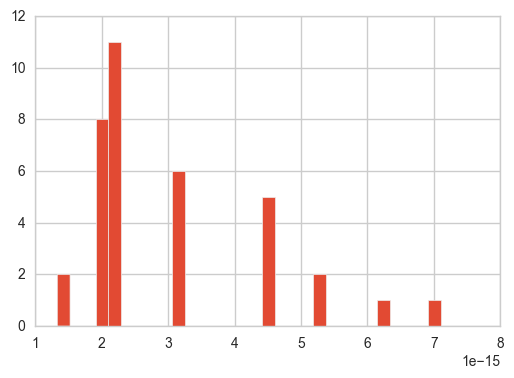

In [161]:
plt.hist(res1.resid, bins = 30)
plt.show() #Clearly as normal as it gets huh. As we mentioned before
#the lack of distribution thereof might influence the results.

In [ ]:
#If 